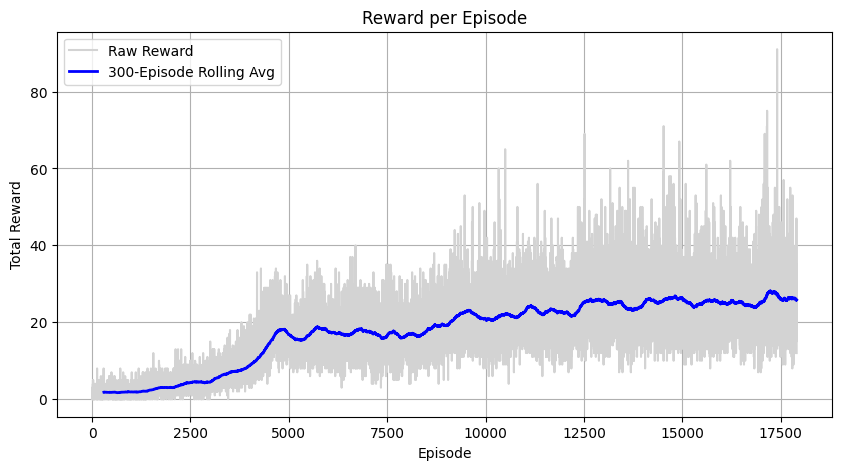

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

log_file = "../data/Breakout/logs/DQN_20251023_202442_log.csv"
df = pd.read_csv(log_file)

episode_rewards = df.groupby("episode")["reward"].sum().reset_index()

window_size = 300  
episode_rewards["reward_smooth"] = episode_rewards["reward"].rolling(window=window_size).mean()


plt.figure(figsize=(10,5))
plt.plot(episode_rewards["episode"], episode_rewards["reward"], color="lightgray", label="Raw Reward")
plt.plot(episode_rewards["episode"], episode_rewards["reward_smooth"], color="blue", linewidth=2, label=f"{window_size}-Episode Rolling Avg")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()
plt.grid(True)

plt.savefig("breakout_DQN_rewards.png", dpi=300, bbox_inches="tight")
plt.show()




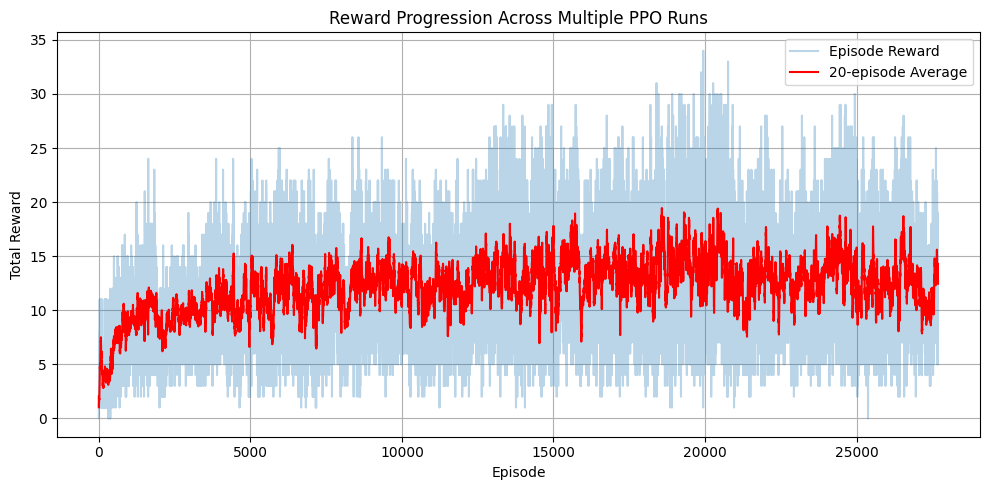

In [7]:
import os
import re


log_dir = "../data/Breakout/logs"
FPS = 60  


files = sorted(
    [f for f in os.listdir(log_dir) if f.startswith("PPO_") and f.endswith("_log.csv")]
)

combined = []
episode_offset = 0 

for f in files:
    match = re.search(r"PPO_(\d{8}_\d{6})_log\.csv", f)
    if not match:
        continue
    
    path = os.path.join(log_dir, f)
    df = pd.read_csv(path)

    
    df["episode"] = df["episode"] + episode_offset

 
    episode_offset = df["episode"].max()
    
    combined.append(df)


all_data = pd.concat(combined, ignore_index=True)


episode_rewards = (
    all_data.groupby("episode")
    .agg({"reward": "sum"})
    .reset_index()
)


episode_rewards["rolling_reward"] = episode_rewards["reward"].rolling(20, min_periods=1).mean()


plt.figure(figsize=(10, 5))
plt.plot(episode_rewards["episode"], episode_rewards["reward"], alpha=0.3, label="Episode Reward")
plt.plot(episode_rewards["episode"], episode_rewards["rolling_reward"], color="red", label="20-episode Average")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward Progression Across Multiple PPO Runs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("breakout_PPO_rewards.png", dpi=300, bbox_inches="tight")
plt.show()
